In [47]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('nba.csv')

### Cleaning

In [49]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [50]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [51]:
# remove stats from current season
df = df[df['Season'].str.contains('2022-23')==False]

In [52]:
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
df = df[df['Pos'].isin(valid_pos)]

### Filtering

In [53]:
experienced_players = df[df['Age'] >= 25]['Name'].unique()
df = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
df = df[df['G'] >= 40]

### Exploring

In [54]:
sns.set_style('darkgrid')

<Figure size 720x14400 with 0 Axes>

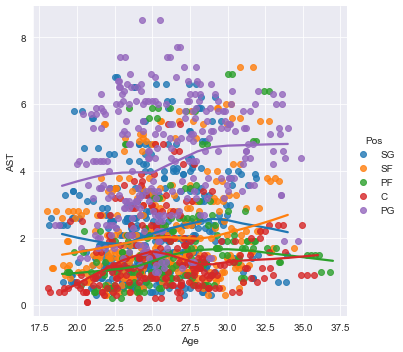

In [62]:
plt.figure(figsize=(10,200))

sns.lmplot(data=df, x='Age', y='AST', x_jitter=1, lowess=True, hue='Pos')
plt.show()